In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
import scipy
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from collections import Counter
from imblearn.combine import SMOTEENN
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing Dataset
df = pd.read_csv(r"C:\Users\Asus\Desktop\churn_analysis_project\Churn_Analysis.csv")


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#printing concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check for Duplicate Records
df[df.duplicated()].shape[0]

0

In [8]:
#checking Datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#since customer id is not required for prediction so droping it
df.drop('customerID',axis=1,inplace=True)

In [10]:
#checking "customerID" column removed or not 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#since "TotalCharges" is present in object type so converting it into numeric type
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
#checking datatypes again to conform "TotalCharges" datatype changed or not 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#printing last few rows of dataset
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [14]:
#Exploratory Data Analysis

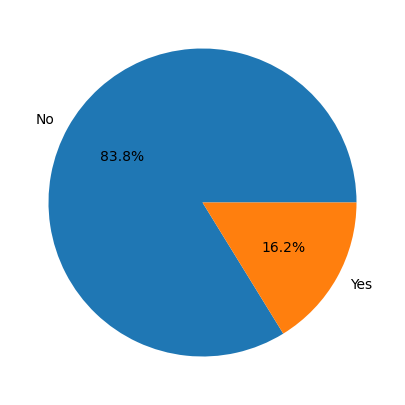

In [15]:
#piechart to check no.of senior citizens
plt.figure(figsize=(10,5))
plt.pie(df["SeniorCitizen"].value_counts(),autopct="%.1f%%",labels=["No","Yes"])
plt.show()

In [16]:
#as we can see 83.8% of the customer are senior and only 16.2% are adult customer.

In [17]:
#now churn is our target and we have 2 values i.e. "Yes" or "No". which means customer is abt to churn or not.

In [18]:
#here are making two different graphs (countplot and pie chart) which shows the count of how many persons are abt to churn. 
#both represents same but we have different views for analysing data.

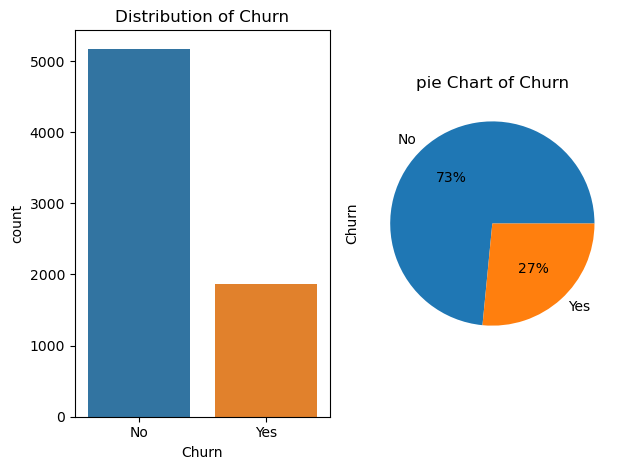

In [19]:
plt.subplot(121)
sns.countplot(data=df,x="Churn")
plt.title("Distribution of Churn")
plt.subplot(122)
df['Churn'].value_counts().plot(kind='pie',autopct="%1.f%%",labels=['No','Yes'])
plt.title('pie Chart of Churn')
plt.tight_layout()
plt.show() 

In [20]:
#since our Dataset is highly imbalanced so we need to balance it before fitting it into model.

In [21]:
#below code shows how much loss we are having because of customer churn

In [22]:
churn_customers=df[df["Churn"]=="Yes"]
loss=churn_customers["TotalCharges"].sum()
total_revenue=df["TotalCharges"].sum()
print("we have lost around $ {} due to customer churn".format(loss))
print("we havelost around{} % of revenue due to customers churn".format(np.round(loss/total_revenue*100,)))

we have lost around $ 2862926.9 due to customer churn
we havelost around18.0 % of revenue due to customers churn


In [23]:
#now we have two variables i.e. Numeric and categorical value
#for numerical variable we will create histogram and for categorical variable we will create count plot

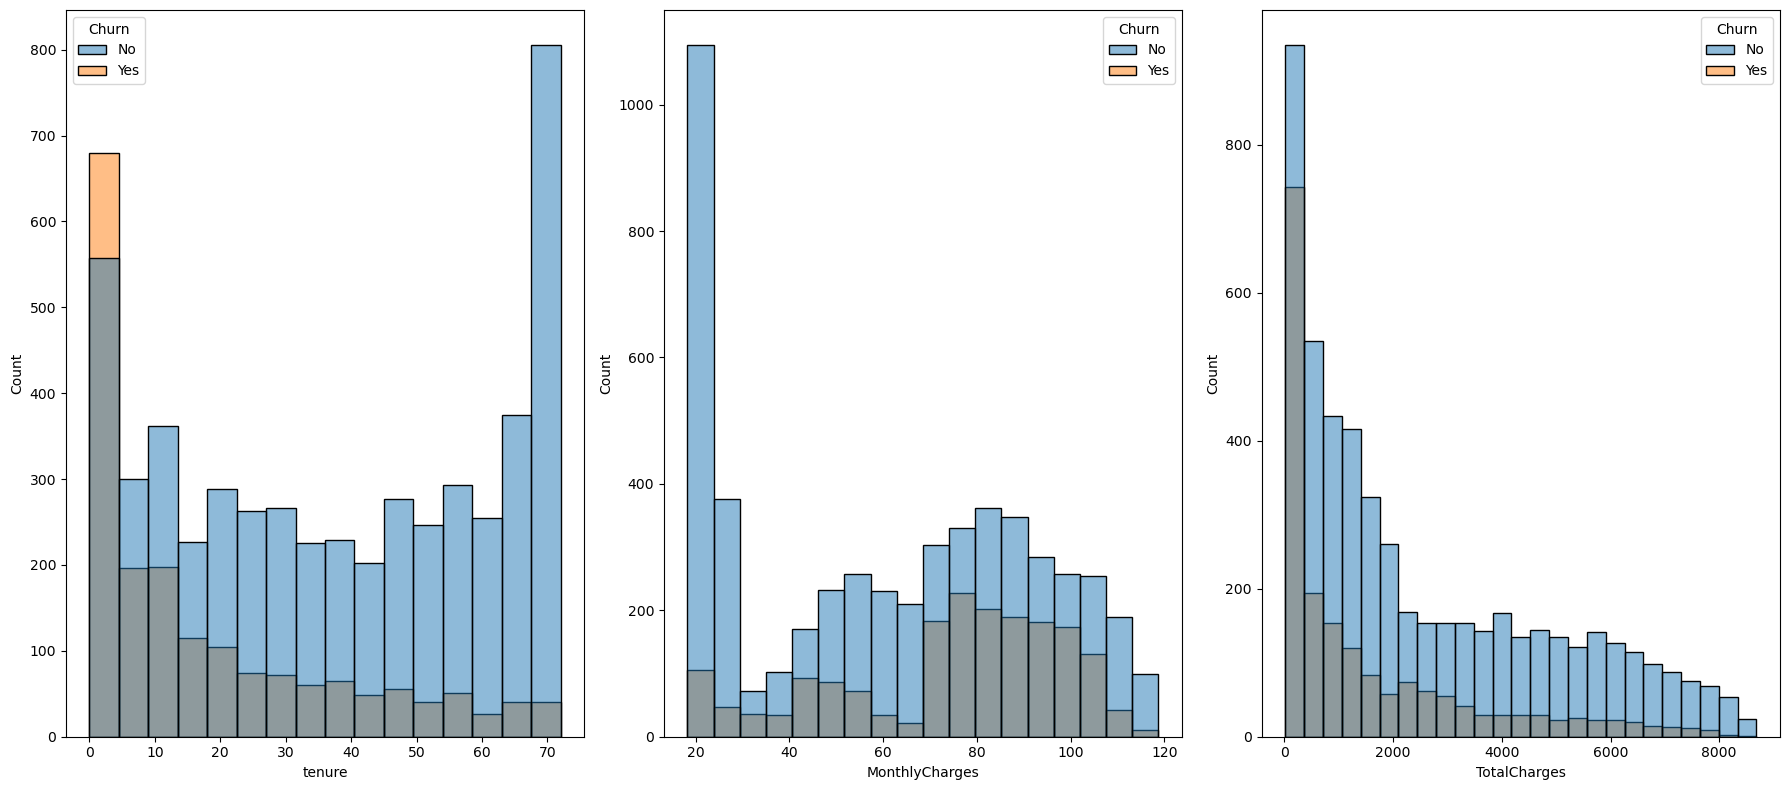

In [24]:
#plotting numerical values with Histogram
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
axes=axs.flatten()
num_columns=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(num_columns):
    if(col!='SeniorCitizen'):
        sns.histplot(x=col,data=df,hue='Churn',ax=axes[i])
fig.tight_layout()
plt.show(  )

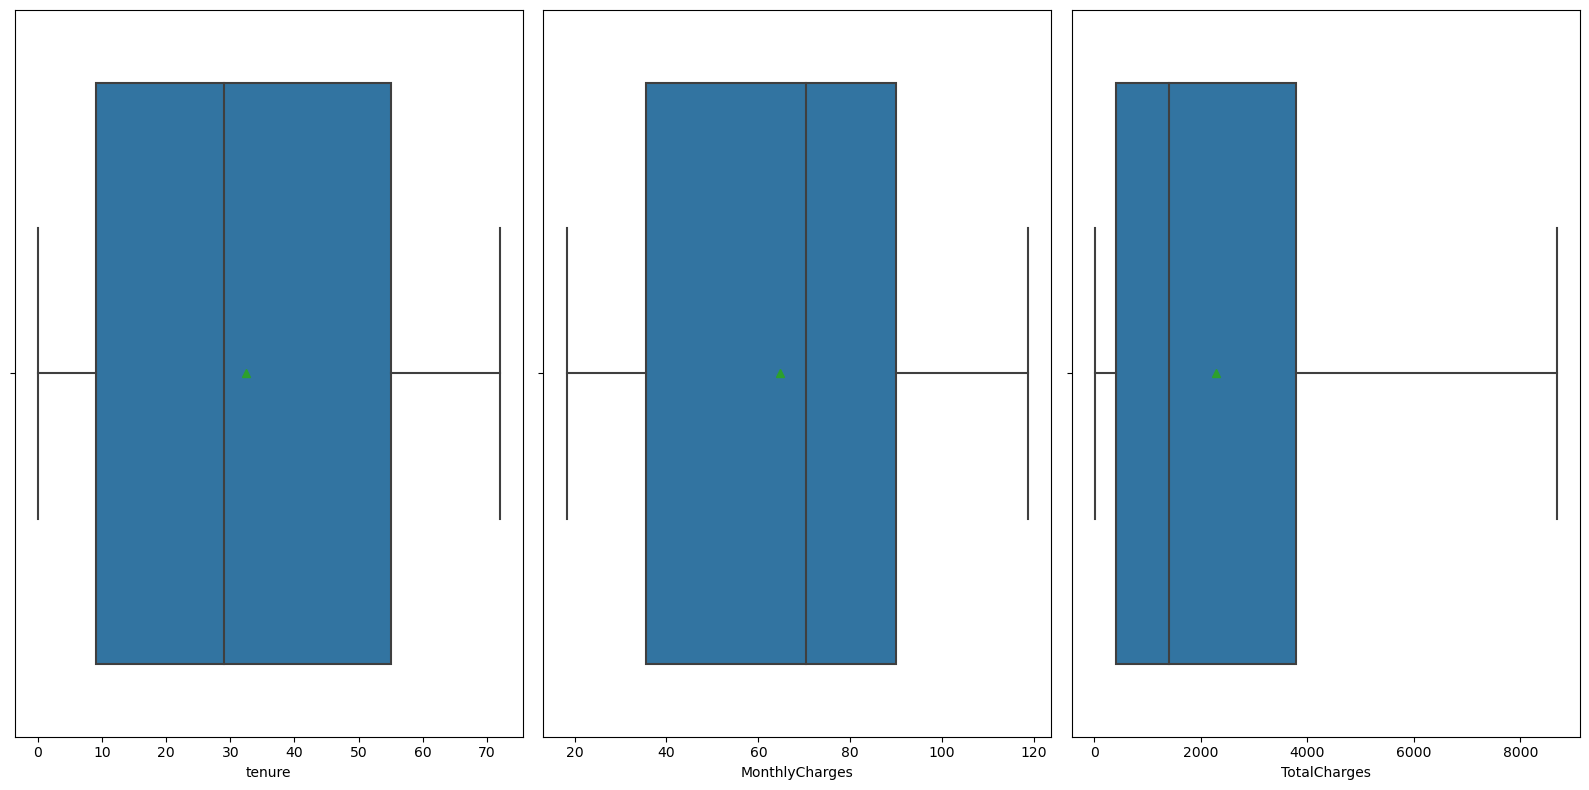

In [25]:
#now ploting numerical features with Boxplot for checking outliers.
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(16,8))
axes=axs.flatten()
num_columns=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(num_columns):
    if(col!='SeniorCitizen'):
        sns.boxplot(x=col,data=df,showmeans=True,ax=axes[i])
fig.tight_layout()
plt.show()    


In [26]:
#after plotting Histogram and Boxplot we found there is no outlier present in numeric dataset so we don't need to do 
#any kind of outlier treatment.

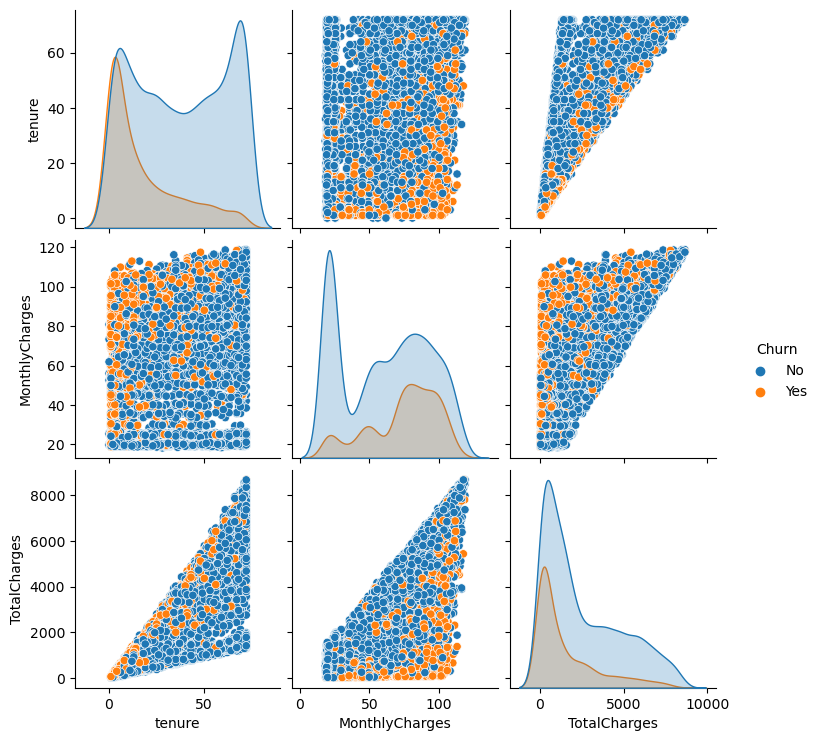

In [27]:
 #plotting pairplot of entire dataset where hue=Chirn and kind=scatter
sns.pairplot(df.drop(columns="SeniorCitizen"),hue="Churn",kind="scatter")
plt.show()

In [28]:
#then we will do multi varient analysis for categorical values

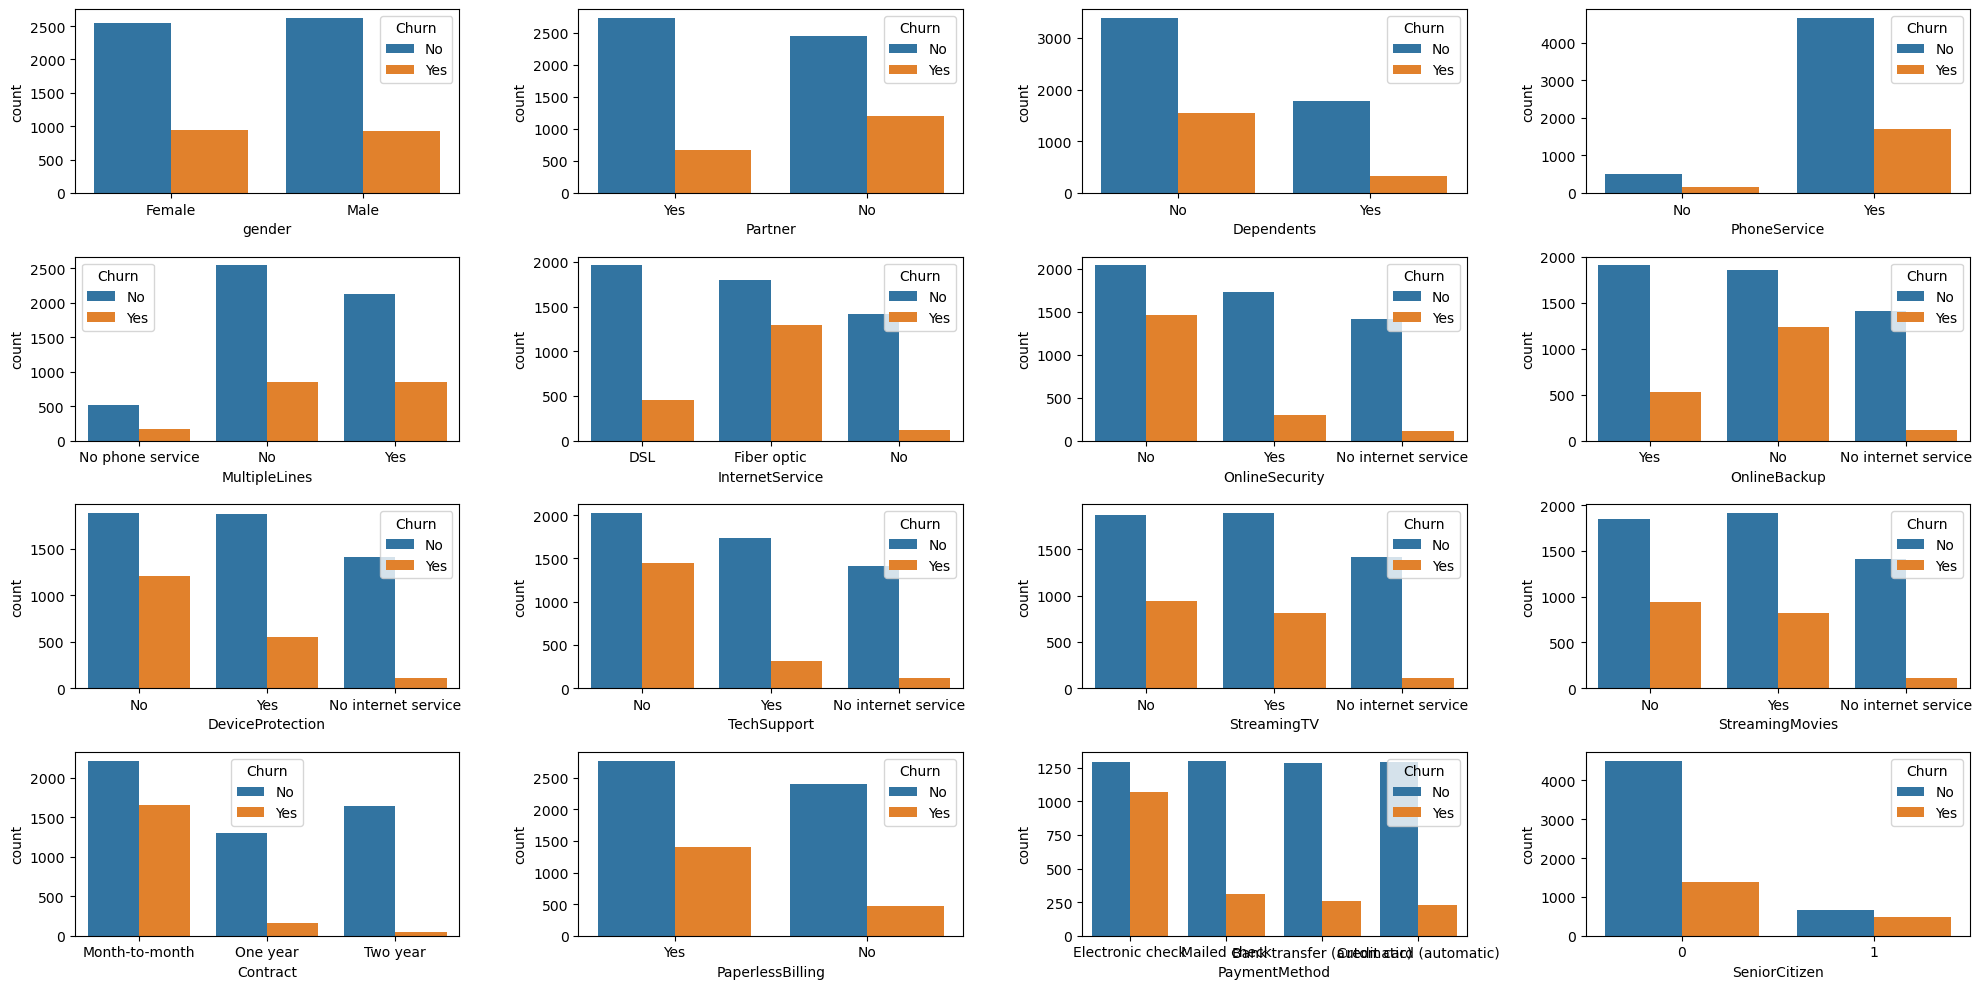

In [29]:
#plotting countplot for categorical variables and removing Churn feature and appending SeniorCitizen
cat_features=list(df.select_dtypes(include='object').columns)
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(20,10))
axes=axs.flatten()
for i,col in enumerate(cat_features):
    sns.countplot(x=col,hue="Churn",data=df,ax=axes[i])
#adjust spacing between subplots
fig.tight_layout()
plt.show()

In [30]:
#now we will clean dataset

In [31]:
#having a look at our dataset at once

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
#since we changed the total charges columns with numeric so we might have the null null values now...< so lets check it out 

In [34]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
#so we have 11 null values in totalcharges colums so now we will replace them by mean of the comums by using
#following code.

In [36]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [37]:
df.isnull().sum().sum()

0

In [38]:
#now we can see that we dont have any more null values

In [39]:
#now we will encode the categorical values into numeric value so it will be easy for algorithm to learn and process.


In [40]:
encoder=LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature]=encoder.fit_transform(df[feature])

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [42]:
#now we can see that we are having only integer and float type values

In [43]:

df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

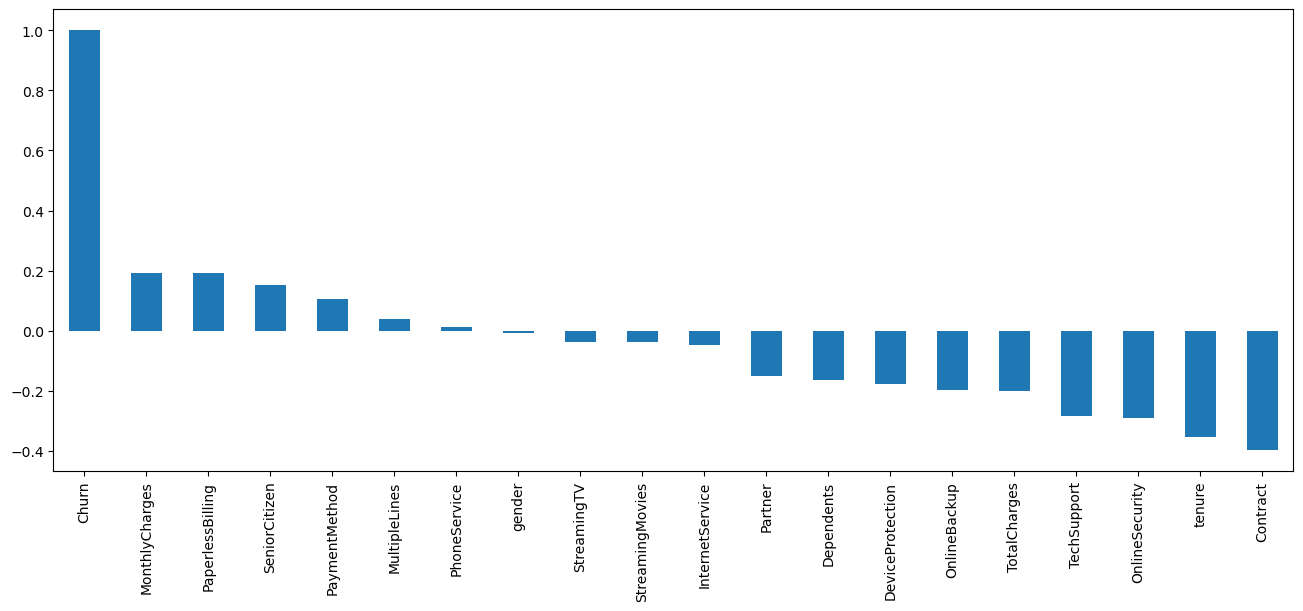

In [44]:
#now we will get correlation of churn with other variable
plt.figure(figsize=(16,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

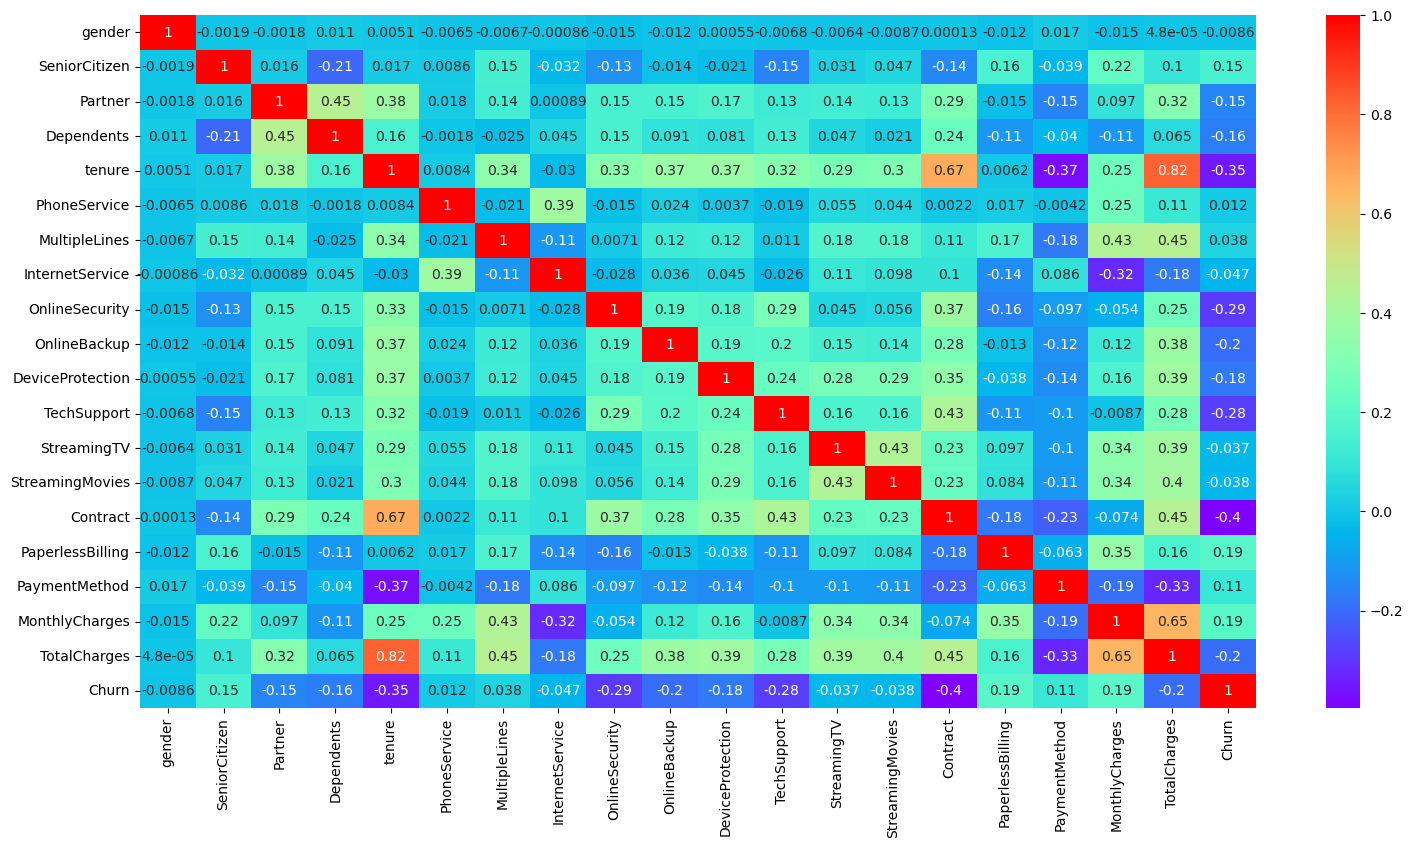

In [45]:
 #now we will plot the same relationship with heatmap 
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

In [46]:
#now we will use ensemble method for model building so there is no need of feature scaling as its 
#prediction is based on creating multiple decision tree

In [47]:
#seperating dependent and independent variables
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [48]:
x.shape

(7043, 19)

In [49]:
#now we will perform feature selection

In [50]:
#selecting only 10 best features out of all which has higher correlation with Churn
select_feature=SelectKBest(k=10)
select_feature.fit(x,y)

SelectKBest()

In [51]:
select_feature.get_feature_names_out()

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [52]:
x=x[select_feature.get_feature_names_out()]

In [53]:
#according to the feature selection we have selected 10 top features out of all.

In [54]:
#Now we will split data into training and validation set in 80:20 ratio.

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
x_train.shape,y_train.shape,x_test.shape,y_train.shape

((5634, 10), (5634,), (1409, 10), (5634,))

In [57]:
#now we will create one function . This function will take model as a argument and test data as an another argument 
#then it will make predictions and print the performance of the model.

#we will take 5 different matrix for model performance like:
    #validation accuracy
    #precision score
    #recall score
    #f1 score
    #classification report

In [58]:
def evaluate_model_performance(model,test_data):
    prediction=model.predict(test_data)
    print("Validation Accuracy : {:.2f} %".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f} %".format(precision_score(y_test,prediction)))
    print("recall score : {:.2f}%".format(recall_score(y_test,prediction)))
    print("F1 score :{:.2f} %".format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))

In [59]:
#now we will make our first model i.e. random forest model
rand_forest=RandomForestClassifier()
rand_forest.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
evaluate_model_performance(rand_forest,x_test)

Validation Accuracy : 0.79 %
Precision Score : 0.63 %
recall score : 0.46%
F1 score :0.53 %
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.46      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



In [61]:
# so here we got 79 % accuracy
#                64 % precision score
#                46 % recall value
#                53 % f1 score

In [62]:
# since our matrix in imbalanced so we cannot consider accuracy as final score so for now we will consider f1 score 
#since f1 score is the harmonic mean precisoion and record

In [63]:
# now we will create the gradient boosting model using same imbalance dataset and without any hyperparameter tuning
gbc_model=GradientBoostingClassifier()
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
evaluate_model_performance(gbc_model,x_test)

Validation Accuracy : 0.81 %
Precision Score : 0.67 %
recall score : 0.53%
F1 score :0.59 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [65]:
#so now we have
#                Validation Accuracy : 0.81 %
#                Precision Score : 0.67 %
#                recall score : 0.53%
#                F1 score :0.59 %

In [66]:
# As we can see our model is not performming up to the mark because of imbalance nature of dataset so we 
# will balance it to reduce TN,FN and increase TP,FP 

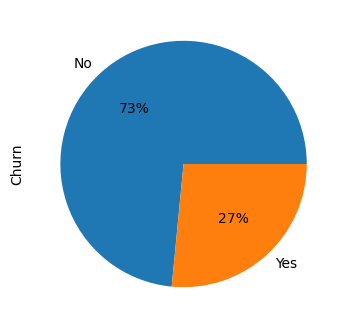

In [67]:
#so let's first plot y so that we can se how much our dataset is imbalanced
plt.figure(figsize=(8,4))
y.value_counts().plot(kind="pie",autopct="%1.f%%",labels=['No','Yes'])
plt.show()

In [68]:
# As we can see that 27% of the customers are abt to churn
# and rest of them are loyal customer 

In [69]:
# Now we have two class 0 and 1 ... 0 means majority class and 1 means minority class

In [70]:
# for balancing dataset we will use SMOTHEENN()
smote=SMOTEENN()
x_st,y_st=smote.fit_resample(x,y)

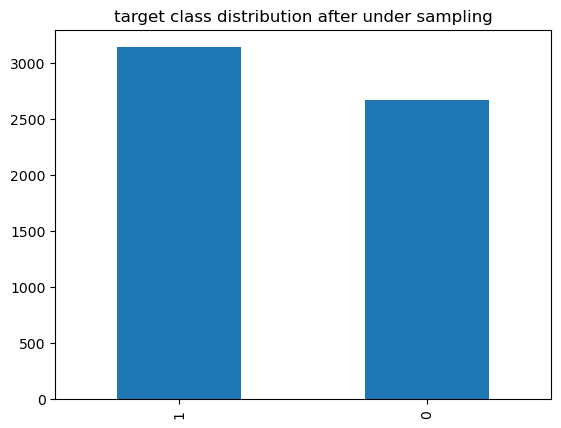

In [71]:
y_st.value_counts().plot(kind="bar")
plt.title("target class distribution after under sampling")
plt.show()

In [72]:
y_st.value_counts()

1    3139
0    2671
Name: Churn, dtype: int64

In [73]:
#since we have perfomed SMOTEENN (which is a combination of Scote + ENN)

#now split training and validation set using balanced dataset
x_train,x_test,y_train,y_test=train_test_split(x_st,y_st,test_size=0.2,random_state=42)

In [74]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4648, 10), (4648,), (1162, 10), (1162,))

In [75]:
# Building Model with balanced dataset and performance hyper parameter tuning using RandomSearchCV

In [76]:
param_grid={'n_estimators':[40,80,120,160,200],
           'max_depth':[2,4,6,8,10],
           "criterion":['gini'],
           "random_state": [27,42,43]}
random_search_cv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=12,cv=5,scoring='f1',verbose=1)
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]},
                   scoring='f1', verbose=1)

In [77]:
#get final model with best param from RandomizedSearchCV
rf_final_model=random_search_cv.best_estimator_

In [78]:
#evaluating random forest classifier
evaluate_model_performance(rf_final_model,x_test)

Validation Accuracy : 0.94 %
Precision Score : 0.95 %
recall score : 0.94%
F1 score :0.95 %
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       558
           1       0.95      0.94      0.95       604

    accuracy                           0.94      1162
   macro avg       0.94      0.94      0.94      1162
weighted avg       0.94      0.94      0.94      1162



In [79]:
# so finally we got 95% of accuracy after balancing dataset


In [80]:
# Let's execute the same thing for gradient boosting algorithm as well
param_grid2={'n_estimators':[100,150,200,250,300],
            'criterion':['friedman_mse','squared_error','mse','mae'],
            'max_depth':[2,4,6,8],
            'learning_rate':[0.001,0.01,0.1,0.2],
            'loss':['deviance','exponential']}

In [81]:
random_search_cv2=RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_distributions=param_grid2,n_iter=12,cv=5,scoring='f1',verbose=1)
random_search_cv2.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=12,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='f1', verbose=1)

In [82]:
#Let's take best parameters
random_search_cv2.best_params_

{'n_estimators': 250,
 'max_depth': 6,
 'loss': 'exponential',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [83]:
gb_final_model=random_search_cv2.best-estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best'

In [ ]:
#evaluating final GradientBoostingClassifier Performance
evaluate_model_performance(gb_final_model,x_test)

In [ ]:
file=open("trained_model.pk1","wb")
pickle.dump(gb_final_model,file)
file.close()